## Chapter 10: Multi-Layer Perceptrons with Keras

Now that I've got [Tensorflow on this machine that doesn't have AVX support](https://www.eggwall.com/2020/09/compiling-tensorflow-without-avx.html), let's take it for a ride.


In [8]:
# Common imports

import matplotlib.cm as cm
from matplotlib.image import imread
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpl_toolkits.mplot3d.axes3d as p3

import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

print("TF version ", tf.__version__)
print("Keras version ", keras.__version__)

TF version  2.3.0
Keras version  2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print (X_train_full.shape)
print (X_train_full.dtype)

4423680/4422102 [==============================] - 6s 1us/step
(60000, 28, 28)
uint8


In [3]:
print (X_train_full.shape)
print (X_train_full.dtype)

(60000, 28, 28)
uint8


Let's split this into a validation set. First 5000 are kept aside for validation.

Pixel densities in the attributes are 0-255, so scaling them down to \[0,1\].
Notice how we specify 255.0 otherwise integer division will lead to either 0 or 1.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000]        , y_train_full[5000:]
X_test = X_test / 255.0

These class-names are specified on the [Keras website](https://www.tensorflow.org/tutorials/keras/classification)

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
class_names[y_train[0]]

'Coat'

Let's look at a single image. By now I am good enough to print this stuff out.

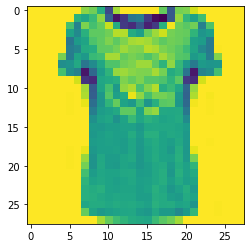

In [15]:
plt.imshow(1 - X_train[1])

And let's create a Tensorflow network with Keras.

In [17]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# This is another way of creating it:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.7015 - accuracy: 0.7694 - val_loss: 0.5748 - val_accuracy: 0.7924
Epoch 2/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4864 - accuracy: 0.8314 - val_loss: 0.4725 - val_accuracy: 0.8358
Epoch 3/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4426 - accuracy: 0.8451 - val_loss: 0.4166 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4159 - accuracy: 0.8528 - val_loss: 0.4072 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3955 - accuracy: 0.8620 - val_loss: 0.3893 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3798 - accuracy: 0.8653 - val_loss: 0.3668 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3651 - accuracy: 0.8707 - val_loss: 0.3612 -

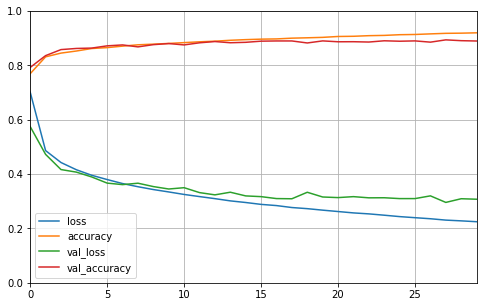

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks good, and convergence has been reached. Accuracy is close to validation accuracy.

In [30]:
# The same model as earlier, but with a different learning rate.
model_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Got a learning rate example from here: https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

model_lr.compile(loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics=["accuracy"])
history_lr = model_lr.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 40s 24ms/step - loss: 0.7146 - accuracy: 0.7642 - val_loss: 0.5144 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4927 - accuracy: 0.8298 - val_loss: 0.4485 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4444 - accuracy: 0.8449 - val_loss: 0.4138 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.4185 - accuracy: 0.8537 - val_loss: 0.4003 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3991 - accuracy: 0.8613 - val_loss: 0.4304 - val_accuracy: 0.8504
Epoch 6/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3821 - accuracy: 0.8669 - val_loss: 0.3776 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3694 - accuracy: 0.8703 - val_loss: 0.3685 -

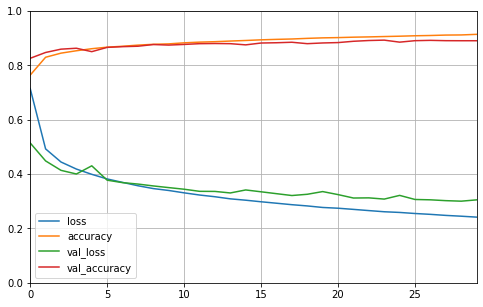

In [35]:
import pandas as pd

pd.DataFrame(history_lr.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

# Batch processing, for later

For later, run with many more epochs and see if the performance improves considerably

In [31]:
# The same model as earlier, but with many more epochs than earlier.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=300,
                   validation_data=(X_valid, y_valid))

Epoch 1/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.7163 - accuracy: 0.7680 - val_loss: 0.5420 - val_accuracy: 0.8142
Epoch 2/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.4888 - accuracy: 0.8305 - val_loss: 0.4649 - val_accuracy: 0.8332
Epoch 3/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.4449 - accuracy: 0.8432 - val_loss: 0.4219 - val_accuracy: 0.8536
Epoch 4/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.4173 - accuracy: 0.8546 - val_loss: 0.4026 - val_accuracy: 0.8648
Epoch 5/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3968 - accuracy: 0.8616 - val_loss: 0.3969 - val_accuracy: 0.8602
Epoch 6/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.3804 - accuracy: 0.8665 - val_loss: 0.3721 - val_accuracy: 0.8690
Epoch 7/300
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0

1719/1719 [==============================] - 42s 24ms/step - loss: 0.1473 - accuracy: 0.9475 - val_loss: 0.3054 - val_accuracy: 0.8972
Epoch 60/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.1452 - accuracy: 0.9491 - val_loss: 0.3115 - val_accuracy: 0.8924
Epoch 61/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.1415 - accuracy: 0.9499 - val_loss: 0.3001 - val_accuracy: 0.8962
Epoch 62/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.1399 - accuracy: 0.9508 - val_loss: 0.3008 - val_accuracy: 0.8952
Epoch 63/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.1375 - accuracy: 0.9516 - val_loss: 0.3051 - val_accuracy: 0.8974
Epoch 64/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.1352 - accuracy: 0.9524 - val_loss: 0.3042 - val_accuracy: 0.8988
Epoch 65/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.1329 - accuracy: 0.9533 - val_loss: 0.3254 

1719/1719 [==============================] - 42s 24ms/step - loss: 0.0581 - accuracy: 0.9811 - val_loss: 0.3833 - val_accuracy: 0.8912
Epoch 115/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.3756 - val_accuracy: 0.8992
Epoch 116/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0569 - accuracy: 0.9814 - val_loss: 0.3876 - val_accuracy: 0.8946
Epoch 117/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0548 - accuracy: 0.9820 - val_loss: 0.3898 - val_accuracy: 0.8978
Epoch 118/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0553 - accuracy: 0.9819 - val_loss: 0.4048 - val_accuracy: 0.8928
Epoch 119/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0550 - accuracy: 0.9823 - val_loss: 0.3868 - val_accuracy: 0.8956
Epoch 120/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0

1719/1719 [==============================] - 42s 24ms/step - loss: 0.0194 - accuracy: 0.9947 - val_loss: 0.5086 - val_accuracy: 0.8944
Epoch 170/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0198 - accuracy: 0.9947 - val_loss: 0.4802 - val_accuracy: 0.8952
Epoch 171/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.5070 - val_accuracy: 0.8930
Epoch 172/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.4925 - val_accuracy: 0.8972
Epoch 173/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0165 - accuracy: 0.9962 - val_loss: 0.5092 - val_accuracy: 0.8954
Epoch 174/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0161 - accuracy: 0.9960 - val_loss: 0.4912 - val_accuracy: 0.8974
Epoch 175/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 0

1719/1719 [==============================] - 42s 24ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5731 - val_accuracy: 0.8974
Epoch 225/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.8988
Epoch 226/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5693 - val_accuracy: 0.8986
Epoch 227/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.5749 - val_accuracy: 0.8982
Epoch 228/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.5774 - val_accuracy: 0.8980
Epoch 229/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5684 - val_accuracy: 0.8974
Epoch 230/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0

1719/1719 [==============================] - 42s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 0.8988
Epoch 280/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6193 - val_accuracy: 0.8984
Epoch 281/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6211 - val_accuracy: 0.8984
Epoch 282/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6214 - val_accuracy: 0.8980
Epoch 283/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6219 - val_accuracy: 0.8980
Epoch 284/300
1719/1719 [==============================] - 42s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6246 - val_accuracy: 0.8980
Epoch 285/300
1719/1719 [==============================] - 42s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0

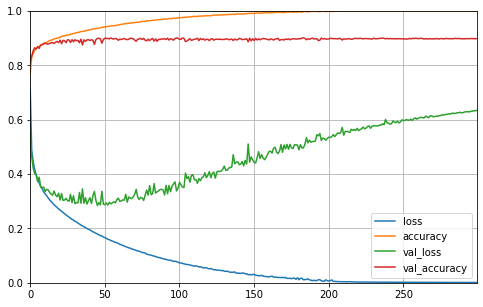

In [36]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks overfitted. The accuracy is 100% but the validation accuracy is 91%.

In [32]:
# A deeper model than earlier, but with as many epochs as the first.
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history3 = model3.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.7099 - accuracy: 0.7638 - val_loss: 0.4921 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4708 - accuracy: 0.8358 - val_loss: 0.4589 - val_accuracy: 0.8362
Epoch 3/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4236 - accuracy: 0.8506 - val_loss: 0.3978 - val_accuracy: 0.8662
Epoch 4/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3954 - accuracy: 0.8593 - val_loss: 0.3922 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3751 - accuracy: 0.8652 - val_loss: 0.3676 - val_accuracy: 0.8742
Epoch 6/30
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3585 - accuracy: 0.8711 - val_loss: 0.3486 - val_accuracy: 0.8776
Epoch 7/30
1719/1719 [==============================] - 59s 35ms/step - loss: 0.3449 - accuracy: 0.8756 - val_loss: 0.3486 -

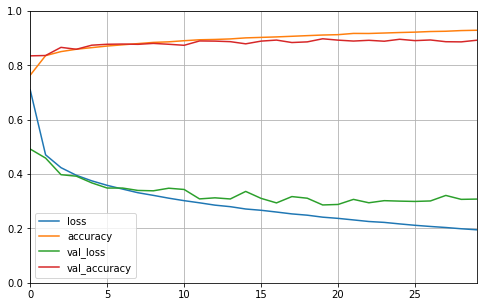

In [38]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks good, and convergence has been reached. Accuracy is close to validation accuracy.

In [33]:
# A deeper model than earlier, but constraining the input layer and expanding again
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.7988 - accuracy: 0.7269 - val_loss: 0.5158 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4945 - accuracy: 0.8251 - val_loss: 0.4614 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4401 - accuracy: 0.8448 - val_loss: 0.4393 - val_accuracy: 0.8462
Epoch 4/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.4095 - accuracy: 0.8534 - val_loss: 0.3902 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 41s 24ms/step - loss: 0.3856 - accuracy: 0.8620 - val_loss: 0.3803 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.3684 - accuracy: 0.8676 - val_loss: 0.3617 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 42s 24ms/step - loss: 0.3523 - accuracy: 0.8727 - val_loss: 0.3745 -

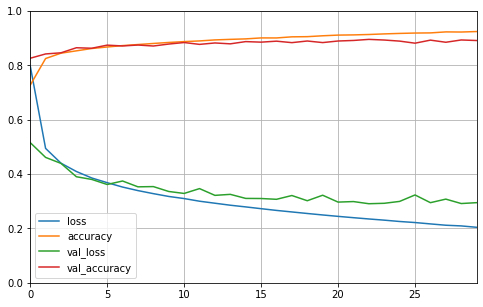

In [37]:
import pandas as pd

pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks good, and convergence has been reached. Accuracy is close to validation accuracy.

In [34]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 256,660
Trainable params: 256,660
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# The same model as earlier, but with many more epochs than earlier.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=300,
                   validation_data=(X_valid, y_valid))

Epoch 1/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.7084 - accuracy: 0.7669 - val_loss: 0.5026 - val_accuracy: 0.8300
Epoch 2/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4839 - accuracy: 0.8321 - val_loss: 0.4500 - val_accuracy: 0.8406
Epoch 3/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4399 - accuracy: 0.8459 - val_loss: 0.4070 - val_accuracy: 0.8634
Epoch 4/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4128 - accuracy: 0.8542 - val_loss: 0.3862 - val_accuracy: 0.8682
Epoch 5/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3939 - accuracy: 0.8612 - val_loss: 0.3728 - val_accuracy: 0.8722
Epoch 6/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3782 - accuracy: 0.8678 - val_loss: 0.3715 - val_accuracy: 0.8708
Epoch 7/300
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3648 - accuracy: 0.8711 - val_loss: 0

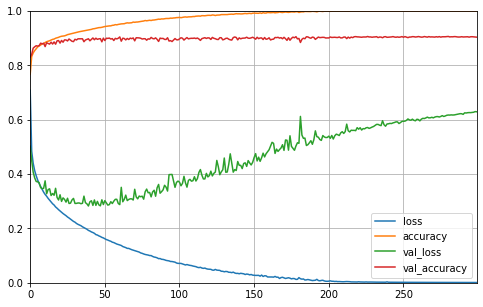

In [40]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

This looks overfitted. The accuracy is 100% but the validation accuracy is 91%.

Let's make a very deep model and see if that is better than model4, from which this is copied.

In [41]:
# A deeper model than earlier, but constraining the input layer and expanding again
model4_deep = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4_deep.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history4_deep = model4_deep.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.9027 - accuracy: 0.6771 - val_loss: 0.5056 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.4989 - accuracy: 0.8227 - val_loss: 0.4496 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.4333 - accuracy: 0.8442 - val_loss: 0.4210 - val_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3961 - accuracy: 0.8558 - val_loss: 0.4251 - val_accuracy: 0.8400
Epoch 5/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3704 - accuracy: 0.8645 - val_loss: 0.3599 - val_accuracy: 0.8722
Epoch 6/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3510 - accuracy: 0.8708 - val_loss: 0.3363 - val_accuracy: 0.8832
Epoch 7/30
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3335 - accuracy: 0.8776 - val_loss: 0.3296 -

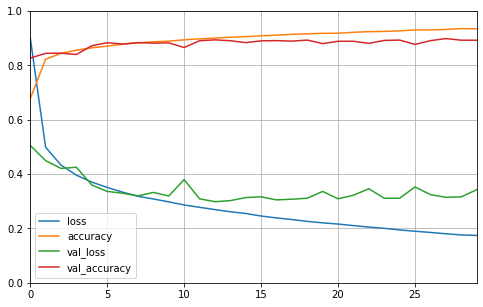

In [42]:
import pandas as pd

pd.DataFrame(history4_deep.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()

So adding extra layers didn't do much good. Let's try removing layers to see what we get.

In [45]:
# A deeper model than earlier, but constraining the input layer and expanding again
model4_shallow = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4_shallow.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
history4_shallow = model4_shallow.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 34s 20ms/step - loss: 0.7180 - accuracy: 0.7634 - val_loss: 0.4988 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4895 - accuracy: 0.8298 - val_loss: 0.4509 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4425 - accuracy: 0.8449 - val_loss: 0.4376 - val_accuracy: 0.8454
Epoch 4/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4148 - accuracy: 0.8540 - val_loss: 0.4436 - val_accuracy: 0.8398
Epoch 5/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3944 - accuracy: 0.8611 - val_loss: 0.4088 - val_accuracy: 0.8522
Epoch 6/30
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3787 - accuracy: 0.8669 - val_loss: 0.3887 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3652 - accuracy: 0.8714 - val_loss: 0.3592 -

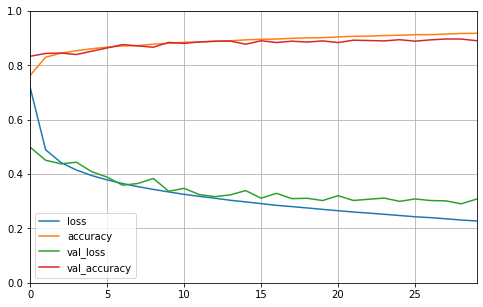

In [46]:
import pandas as pd

pd.DataFrame(history4_shallow.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis set to [0,1]
plt.show()